In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_netlist_graph(
    num_nodes=100,
    num_edges=None,
    random_graph=True,
    enable_area=True,
    #Area (chip constraints) of the node or the gate assembly
    enable_power=True,
    # Power consumption of the gate (used to optimize or reduce heat generation or power consumption per chip)
    enable_wire_count=True,
    # Number of wires represented by an edge
    enable_distance=True
    # Distance of the wire to calculate power dissipation and delay
):
    """Generates a netlist as a graph with configurable node & edge attributes."""

    G = nx.Graph()

    # Generate nodes with optional attributes
    for i in range(num_nodes):
        node_attrs = {}
        #These are the node weights i.e. area and power consumption
        if enable_area:
            node_attrs["area"] = round(random.uniform(10, 100), 2)  # Random area in arbitrary units
        if enable_power:
            node_attrs["power"] = round(random.uniform(0.1, 5.0), 2)  # Power in Watts

        G.add_node(i, **node_attrs)

    # Generate edges with optional attributes
    possible_edges = [(i, j) for i in range(num_nodes) for j in range(i + 1, num_nodes)]
    if random_graph:
        if num_edges is None:
            num_edges = random.randint(num_nodes, num_nodes * 2)  # Random edge count
        edges = random.sample(possible_edges, min(num_edges, len(possible_edges)))
    else:
        edges = possible_edges  # Fully connected graph (not recommended for large sizes)

    for u, v in edges:
        edge_attrs = {}
        #These are edge weights like nuumber of wires and distance of that edge
        if enable_wire_count:
            edge_attrs["wire_count"] = random.randint(1, 10)  # Number of wires in the net
        if enable_distance:
            edge_attrs["distance"] = round(np.linalg.norm(np.array([u, v])), 2)  # Euclidean approx

        G.add_edge(u, v, **edge_attrs)

    return G



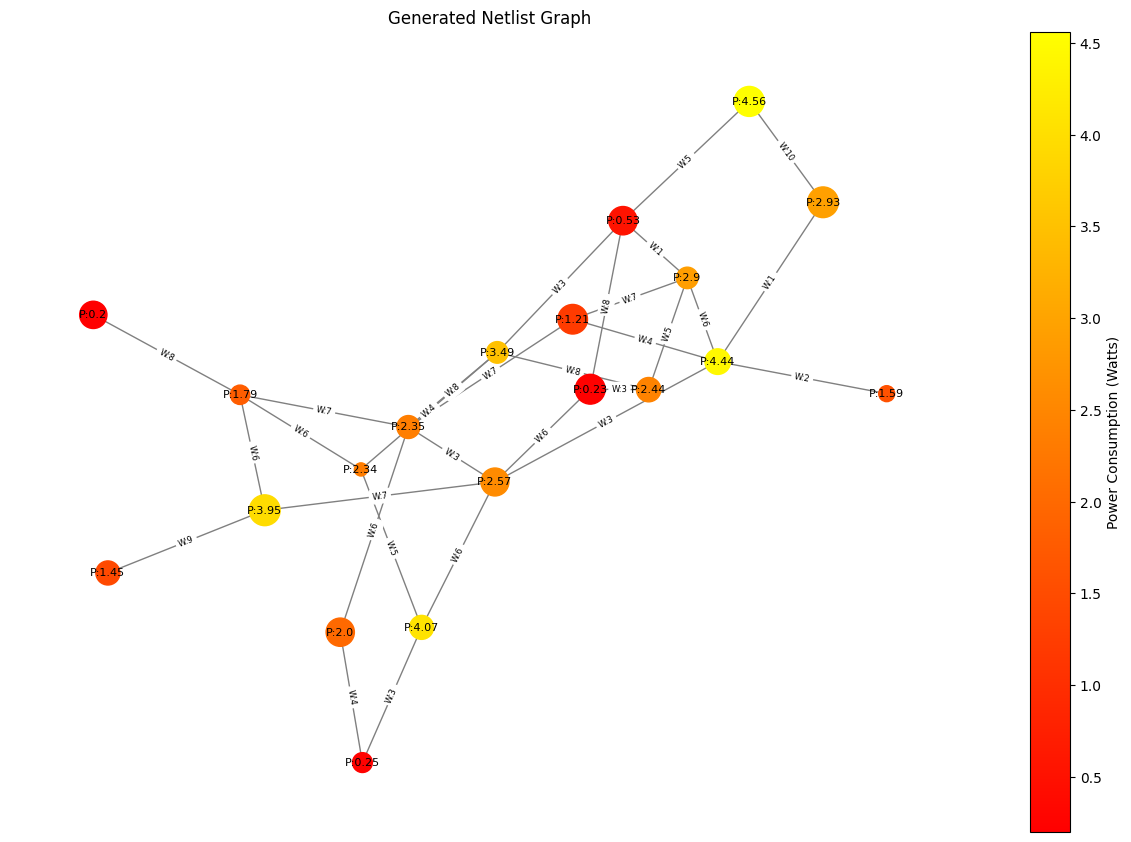

In [7]:
def visualize_graph(G):
    """Visualizes the generated netlist graph using NetworkX with power-based coloring."""
    plt.figure(figsize=(12, 8))  # Bigger figure for better readability
    pos = nx.spring_layout(G, k=0.2, seed=42)  # Spread nodes out

    # Extract power values for coloring (default to 0 if power is disabled)
    power_values = np.array([G.nodes[n].get('power', 0) for n in G.nodes])

    # Normalize power for color mapping
    norm_power = (power_values - power_values.min()) / (power_values.max() - power_values.min() + 1e-6)

    # Map power to color (Yellow to Red)
    node_colors = plt.cm.autumn(norm_power)

    # Set node sizes proportional to area (default size if area is not enabled)
    node_sizes = [G.nodes[n].get('area', 50) * 5 for n in G.nodes]  # Scale factor for visibility

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color='gray', cmap=plt.cm.autumn)

    # Draw node labels (show power consumption)
    node_labels = {n: f"P:{G.nodes[n].get('power', 'N/A')}" for n in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')

    # Draw only wire count for edges (reduce clutter)
    edge_labels = {(u, v): f"W:{G.edges[u, v].get('wire_count', 'N/A')}" for u, v in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

    #Ensure colorbar is properly assigned for power
    sm = plt.cm.ScalarMappable(cmap=plt.cm.autumn, norm=plt.Normalize(vmin=power_values.min(), vmax=power_values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label("Power Consumption (Watts)")

    plt.title("Generated Netlist Graph")
    plt.show()

# Example Usage
G = generate_netlist_graph(num_nodes=20, num_edges=30, enable_area=True, enable_power=True, enable_wire_count=True, enable_distance=True)
visualize_graph(G)
